In [1]:
import cv2
import numpy as np

In [2]:
img=cv2.imread("D:\\dip gonzales images\\DIP3E_CH03_Original_Images\\DIP3E_Original_Images_CH03\\hist1.tif")
cv2.imshow("image",img)
cv2.waitKey(0)

-1

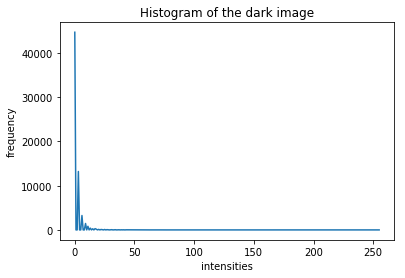

In [4]:
from matplotlib import pyplot as plt
hist = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(hist)
plt.title("Histogram of the dark image")
plt.xlabel("intensities")
plt.ylabel("frequency")
plt.show()

In [5]:
img=cv2.imread("D:\\dip gonzales images\\DIP3E_CH03_Original_Images\\DIP3E_Original_Images_CH03\\bright.tif")
cv2.imshow("image",img)
cv2.waitKey(0)

-1

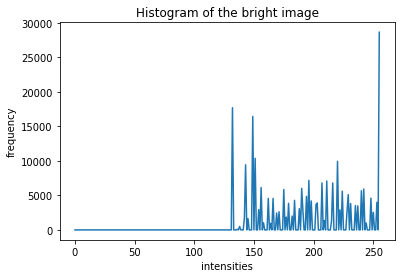

In [6]:
from matplotlib import pyplot as plt
hist = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(hist)
plt.title("Histogram of the bright image")
plt.xlabel("intensities")
plt.ylabel("frequency")
plt.show()

In [7]:
img=cv2.imread("D:\\dip gonzales images\\DIP3E_CH03_Original_Images\\DIP3E_Original_Images_CH03\\top.tif")
cv2.imshow("image",img)
cv2.waitKey(0)

-1

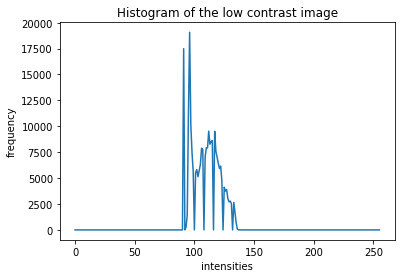

In [8]:
from matplotlib import pyplot as plt
hist = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(hist)
plt.title("Histogram of the low contrast image")
plt.xlabel("intensities")
plt.ylabel("frequency")
plt.show()

In [9]:
img=cv2.imread("D:\\dip gonzales images\\DIP3E_CH03_Original_Images\\DIP3E_Original_Images_CH03\\high.tif")
cv2.imshow("image",img)
cv2.waitKey(0)

-1

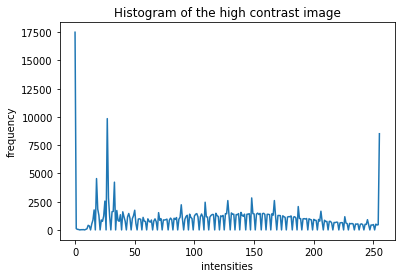

In [10]:
from matplotlib import pyplot as plt
hist = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(hist)
plt.title("Histogram of the high contrast image")
plt.xlabel("intensities")
plt.ylabel("frequency")
plt.show()

In [11]:
img=cv2.imread("C:\\Users\\HP\\Desktop\\DIP PRESENTATIONS\\color.png")
cv2.imshow("color image",img)
cv2.waitKey(0)

-1

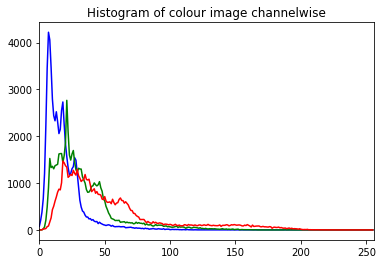

In [12]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
    plt.title("Histogram of colour image channelwise")
plt.show()

In [15]:
import cv2
import numpy as np
img=cv2.imread("D:\\dip gonzales images\\DIP3E_CH03_Original_Images\\DIP3E_Original_Images_CH03\\high.tif",0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv2.imshow('res.png',res)
cv2.waitKey(0)

-1

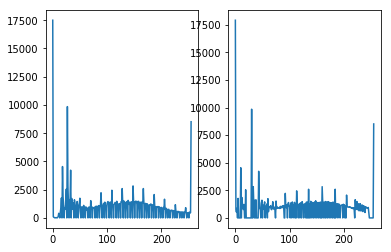

In [16]:
#Histogram of both the images
hist = cv2.calcHist([img],[0],None,[256],[0,256])
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.plot(hist)
hist1 = cv2.calcHist([equ],[0],None,[256],[0,256])
plt.subplot(1,2,2)
plt.plot(hist1)

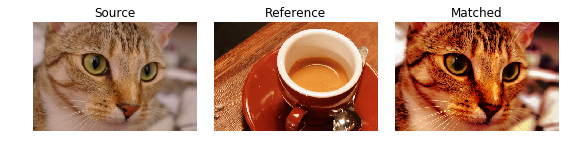

In [17]:
#Histogram matching
import matplotlib.pyplot as plt
from skimage import data
from skimage import exposure
from skimage.transform.histogram_matching import match_histograms
reference=data.coffee()
image=data.chelsea()
matched=match_histograms(image,reference,multichannel=True)
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()
ax1.imshow(image)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()

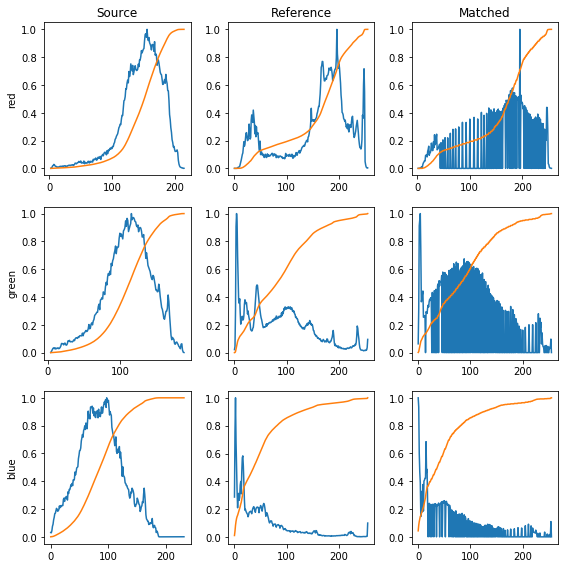

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
for i, img in enumerate((image, reference, matched)):
    for c, c_color in enumerate(('red', 'green', 'blue')):
        img_hist, bins = exposure.histogram(img[..., c])
        axes[c, i].plot(bins, img_hist / img_hist.max())
        img_cdf, bins = exposure.cumulative_distribution(img[..., c])
        axes[c, i].plot(bins, img_cdf)
        axes[c, 0].set_ylabel(c_color)

axes[0, 0].set_title('Source')
axes[0, 1].set_title('Reference')
axes[0, 2].set_title('Matched')
plt.tight_layout()
plt.show()